## Importaçõe Global - 3A

In [3]:
import time
import psutil

# Configure os parâmetros do experimento
num_executions = 10  # Número de execuções para cada algoritmo

## 2A

In [4]:
import pandas as pd
import itertools

# Função para calcular o lucro de uma entrega
def calcular_lucro(entrega, conexoes):
    lucro = 0
    destino_atual = 'A'
    tempo_atual = 0
    for horario, destino, bonus in entrega:
        tempo_para_destino = int(conexoes[destino_atual][destino])
        tempo_atual += tempo_para_destino
        if tempo_atual <= horario:
            lucro += int(bonus)
            destino_atual = destino
    return lucro

# Carregar conexões e tempos a partir de um arquivo CSV usando o Pandas
def carregar_conexoes(arquivo):
    conexoes_df = pd.read_csv(arquivo, index_col=0)
    return conexoes_df

# Carregar lista de entregas a partir de um arquivo CSV usando o Pandas
def carregar_entregas(arquivo):
    entregas_df = pd.read_csv(arquivo)
    entregas = [tuple(row) for row in entregas_df.values]
    return entregas

# Arquivos CSV contendo conexões e entregas
arquivo_conexoes = 'conexoes.csv'
arquivo_entregas = 'entregas.csv'

# Carregar conexões e entregas
tempo_entre_destinos = carregar_conexoes(arquivo_conexoes)
lista_de_entregas = carregar_entregas(arquivo_entregas)

# Função para encontrar a melhor combinação de entregas
def encontrar_melhor_combinacao(permutacoes_entregas, calcular_lucro, tempo_entre_destinos):
    melhor_combinacao = None
    melhor_lucro = 0

    for entrega_combinacao in permutacoes_entregas:
        lucro_total = calcular_lucro(entrega_combinacao, tempo_entre_destinos)
        if lucro_total > melhor_lucro:
            melhor_lucro = lucro_total
            melhor_combinacao = entrega_combinacao

    return melhor_combinacao, melhor_lucro

# Gerar todas as permutações possíveis das entregas
permutacoes_entregas = list(itertools.permutations(lista_de_entregas))

# Encontrar a melhor combinação de entregas
melhor_combinacao, melhor_lucro = encontrar_melhor_combinacao(permutacoes_entregas, calcular_lucro, tempo_entre_destinos)

# Exibir a sequência de entregas programadas e o lucro esperado
print("Sequência de Entregas Programadas:")
for entrega in melhor_combinacao:
    print(entrega)
print("Lucro Esperado:", melhor_lucro)

FileNotFoundError: [Errno 2] No such file or directory: 'conexoes.csv'

## 2B

In [ ]:
import pandas as pd

# Função para calcular o lucro de uma entrega
def calcular_lucro_memo(entrega, conexoes, memo, destino_atual, tempo_atual):
    if not entrega:
        return 0
    chave = (entrega[0][1:], destino_atual, tempo_atual)
    if chave in memo:
        return memo[chave]

    lucro_com_entrega = 0
    horario, destino, bonus = entrega[0]
    tempo_para_destino = int(conexoes[destino_atual][destino])
    tempo_atual += tempo_para_destino

    if tempo_atual <= horario:
        lucro_com_entrega = int(bonus) + calcular_lucro_memo(entrega[1:], conexoes, memo, destino, tempo_atual)

    lucro_sem_entrega = calcular_lucro_memo(entrega[1:], conexoes, memo, destino_atual, tempo_atual)

    memo[chave] = max(lucro_com_entrega, lucro_sem_entrega)
    return memo[chave]

# Carregar conexões e tempos a partir de um arquivo CSV usando o Pandas
def carregar_conexoes(arquivo):
    conexoes_df = pd.read_csv(arquivo, index_col=0)
    return conexoes_df

# Carregar lista de entregas a partir de um arquivo CSV usando o Pandas
def carregar_entregas(arquivo):
    entregas_df = pd.read_csv(arquivo)
    entregas = [tuple(row) for row in entregas_df.values]
    return entregas

# Arquivos CSV contendo conexões e entregas
arquivo_conexoes = 'conexoes.csv'
arquivo_entregas = 'entregas.csv'

# Carregar conexões e entregas
tempo_entre_destinos = carregar_conexoes(arquivo_conexoes)
lista_de_entregas = carregar_entregas(arquivo_entregas)

# Inicializar variáveis
destino_inicial = 'A'  # Defina o destino inicial
tempo_inicial = 0
memo = {}

# Calcular o lucro máximo
melhor_lucro = calcular_lucro_memo(lista_de_entregas, tempo_entre_destinos, memo, destino_inicial, tempo_inicial)

# Exibir o lucro máximo
print("Lucro Máximo Esperado:", melhor_lucro)

Lucro Máximo Esperado: 10


## 2C

In [ ]:
import random

# Defina a representação dos indivíduos (cromossomos)
def gerar_individuo(entregas):
  return random.sample(entregas, len(entregas))

# Avaliação de fitness
def avaliar_fitness(individuo):
  lucro_total = sum(entrega[2] for entrega in individuo)
  return lucro_total

# Crossover (Recombinação)
def crossover(individuo1, individuo2):
  ponto_corte = random.randint(1, len(individuo1)-1)
  filho1 = individuo1[:ponto_corte] + [entrega for entrega in individuo2 if entrega not in individuo1[:ponto_corte]]
  filho2 = individuo2[:ponto_corte] + [entrega for entrega in individuo1 if entrega not in individuo2[:ponto_corte]]
  return filho1, filho2

# Mutação
def mutacao(individuo):
  pos1 = random.randint(0, len(individuo)-1)
  pos2 = random.randint(0, len(individuo)-1)
  individuo[pos1], individuo[pos2] = individuo[pos2], individuo[pos1]
  return individuo

# Algoritmo Genético
def algoritmo_genetico(entregas, num_geracoes, tam_populacao):
  populacao = [gerar_individuo(entregas) for _ in range(tam_populacao)]

  for _ in range(num_geracoes):
    nova_populacao = []

    # Avaliar fitness
    avaliacoes = [(avaliar_fitness(individuo), individuo) for individuo in populacao]
    avaliacoes.sort(reverse=True)

    # Elitismo - manter os melhores indivíduos
    nova_populacao.extend([individuo for _, individuo in avaliacoes[:2]])

    # Crossover e mutação para gerar nova população
    while len(nova_populacao) < tam_populacao:
      pai1, pai2 = random.sample(populacao, 2)
      filho1, filho2 = crossover(pai1, pai2)
      filho1 = mutacao(filho1)
      filho2 = mutacao(filho2)
      nova_populacao.extend([filho1, filho2])

    populacao = nova_populacao

  melhor_individuo = max([(avaliar_fitness(individuo), individuo) for individuo in populacao])[1]
  return melhor_individuo

# Exemplo de uso
entregas = [(0, 'A', 5), (0, 'B', 1), (5, 'C', 10), (10, 'D', 8)]
melhor_sequencia = algoritmo_genetico(entregas, num_geracoes=100, tam_populacao=10)

print("Melhor sequência de entregas:", melhor_sequencia)
print("Lucro obtido:", avaliar_fitness(melhor_sequencia))

Melhor sequência de entregas: [(10, 'D', 8), (5, 'C', 10), (0, 'B', 1), (0, 'A', 5)]
Lucro obtido: 24


## 3AB - 2ABC

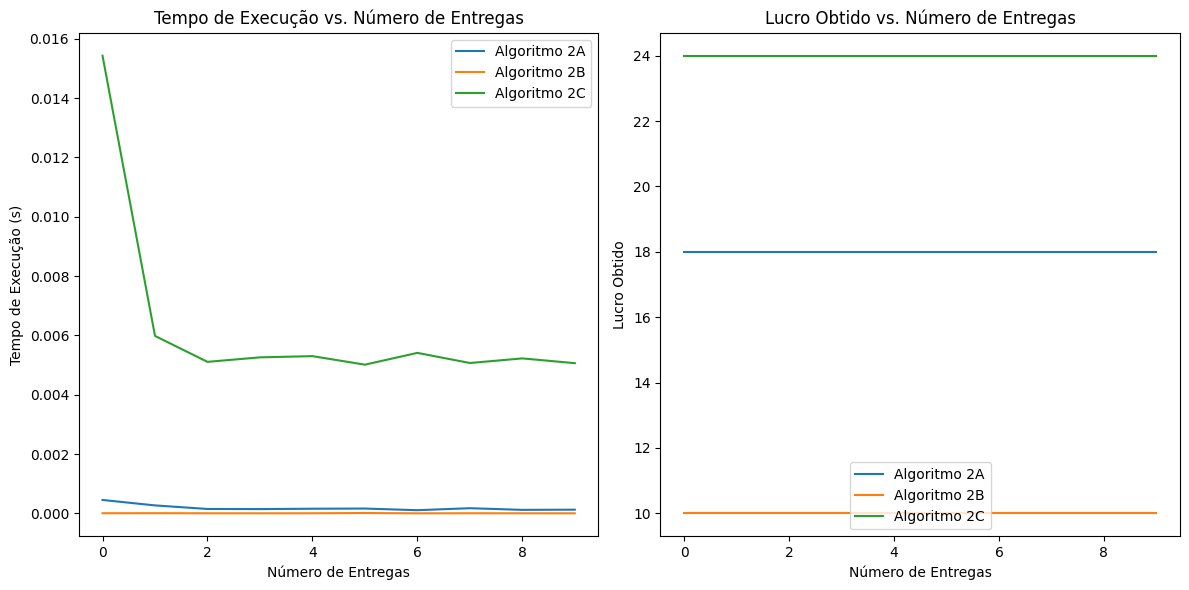

In [ ]:
import matplotlib.pyplot as plt

# Definir Métricas de Desempenho
tempos_de_execucao_2a = []
lucros_obtidos_2a = []
tempos_de_execucao_2b = []
lucros_obtidos_2b = []
tempos_de_execucao_2c = []
lucros_obtidos_2c = []

# Exemplo de uso
for _ in range(num_executions):
  # 2A
  tempo_inicio_2a = time.time()
  melhor_lucro_retornado_2a = encontrar_melhor_combinacao(permutacoes_entregas, calcular_lucro, tempo_entre_destinos)[1]
  lucros_obtidos_2a.append(melhor_lucro_retornado_2a)
  tempo_fim_2a = time.time()
  tempos_de_execucao_2a.append(tempo_fim_2a - tempo_inicio_2a)
  # 2B
  tempo_inicio_2b = time.time()
  melhor_lucro_retornado_2b = calcular_lucro_memo(lista_de_entregas, tempo_entre_destinos, memo, destino_inicial, tempo_inicial)
  lucros_obtidos_2b.append(melhor_lucro_retornado_2b)
  tempo_fim_2b = time.time()
  tempos_de_execucao_2b.append(tempo_fim_2b - tempo_inicio_2b)
  # 2C
  tempo_inicio_2c = time.time()
  melhor_sequencia = algoritmo_genetico(entregas, num_geracoes=100, tam_populacao=10)
  lucros_obtidos_2c.append(avaliar_fitness(melhor_sequencia))
  tempo_fim_2c = time.time()
  tempos_de_execucao_2c.append(tempo_fim_2c - tempo_inicio_2c)

# Plotar Gráficos
plt.figure(figsize=(12, 6))

# Gráfico de barras para o tempo de execução
plt.subplot(1, 2, 1)
plt.plot(range(num_executions), tempos_de_execucao_2a, label='Algoritmo 2A')
plt.plot(range(num_executions), tempos_de_execucao_2b, label='Algoritmo 2B')
plt.plot(range(num_executions), tempos_de_execucao_2c, label='Algoritmo 2C')
plt.xlabel('Número de Entregas')
plt.ylabel('Tempo de Execução (s)')
plt.title('Tempo de Execução vs. Número de Entregas')
plt.legend()

# Gráfico de barras para o lucro obtido
plt.subplot(1, 2, 2)
plt.plot(range(num_executions), lucros_obtidos_2a, label='Algoritmo 2A')
plt.plot(range(num_executions), lucros_obtidos_2b, label='Algoritmo 2B')
plt.plot(range(num_executions), lucros_obtidos_2c, label='Algoritmo 2C')
plt.xlabel('Número de Entregas')
plt.ylabel('Lucro Obtido')
plt.title('Lucro Obtido vs. Número de Entregas')
plt.legend()

plt.tight_layout()
plt.show()

## 4A - **Execução deverá ser local**

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random

# Função de simulação
def simular_selecao_entregas():
  # Simulação de seleção de entregas (substitua por sua lógica)
  entregas_selecionadas = random.sample(entregas, random.randint(1, len(entregas)))
  lucro_total = sum(entrega[2] for entrega in entregas_selecionadas)

  # Atualizar o texto na interface gráfica
  resultado_label.config(text=f"Entregas selecionadas: {entregas_selecionadas}\nLucro total:{lucro_total}")

# Configurações iniciais
entregas = [(0, 'A', 5), (0, 'B', 1), (5, 'C', 10), (10, 'D', 8)]

# Criar janela
root = tk.Tk()
root.title("Simulação de Seleção de Entregas")

# Botão de simulação
simular_button = ttk.Button(root, text="Simular Seleção de Entregas",
command=simular_selecao_entregas)

simular_button.pack(pady=10)

# Resultado da simulação
resultado_label = ttk.Label(root, text="")
resultado_label.pack()

# Gráfico de barras (substitua pelos seus dados)
fig = Figure(figsize=(5, 4), dpi=100)
ax = fig.add_subplot(111)
dados = ['A', 'B', 'C', 'D']
valores = [random.randint(1, 10) for _ in range(4)]
ax.bar(dados, valores)

# Adicionar gráfico à interface
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack()

# Iniciar aplicação
root.mainloop()

## 4B - **Execução deverá ser local**

In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random

# Função de simulação
def simular_selecao_entregas():
  try:
    num_entregas = int(num_entregas_entry.get())
    if num_entregas <= 0 or num_entregas > len(entregas):
      messagebox.showerror("Erro", "Número de entregas inválido.")
      return

    # Simulação de seleção de entregas (substitua por sua lógica)
    entregas_selecionadas = random.sample(entregas, num_entregas)
    lucro_total = sum(entrega[2] for entrega in entregas_selecionadas)

    # Atualizar o texto na interface gráfica
    resultado_label.config(text=f"Entregas selecionadas: {entregas_selecionadas}\nLucrototal: {lucro_total}")

  except ValueError:
    messagebox.showerror("Erro", "Por favor, insira um número válido de entregas.")

# Configurações iniciais
entregas = [(0, 'A', 5), (0, 'B', 1), (5, 'C', 10), (10, 'D', 8)]

# Criar janela
root = tk.Tk()
root.title("Simulação de Seleção de Entregas")

# Número de entregas a serem selecionadas
ttk.Label(root, text="Número de Entregas:").pack()
num_entregas_entry = ttk.Entry(root)
num_entregas_entry.pack(pady=5)

# Botão de simulação
simular_button = ttk.Button(root, text="Simular Seleção de Entregas", command=simular_selecao_entregas)
simular_button.pack(pady=10)

# Resultado da simulação
resultado_label = ttk.Label(root, text="")
resultado_label.pack()

# Gráfico de barras (substitua pelos seus dados)
fig = Figure(figsize=(5, 4), dpi=100)
ax = fig.add_subplot(111)
dados = ['A', 'B', 'C', 'D']
valores = [random.randint(1, 10) for _ in range(4)]
ax.bar(dados, valores)

# Adicionar gráfico à interface
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack()

# Iniciar aplicação
root.mainloop()

TclError: ignored